In [519]:
from cgi import nolog

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import xlabel, xticks
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import numpy as np
from numpy import arange
import pandas as pd
from pandas import set_option
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error

In [566]:
bigmac = pd.read_csv("bigmac_new.csv")
bigmac["date"] = pd.to_datetime(bigmac["date"])

In [567]:
import pandas as pd
        
bigmac_new = pd.read_csv('bigmac_new.csv', sep = ',')
bigmac_new

,Unnamed: 0,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,Inflation_USD,Inflation_Local,GDP,region
0,0,2000-04-01,BRA,BRL,Brazil,2.95,1.790,1.648045,NaN,NaN,3726.811669,Americas
1,1,2001-04-01,BRA,BRL,Brazil,3.60,2.190,1.643836,-0.002554,0.220339,3142.235140,Americas
2,2,2002-04-01,BRA,BRL,Brazil,3.60,2.340,1.538462,-0.064103,0.000000,2824.715413,Americas
3,3,2003-04-01,BRA,BRL,Brazil,4.55,3.070,1.482085,-0.036645,0.263889,3056.649798,Americas
4,4,2004-05-01,BRA,BRL,Brazil,5.40,3.180,1.698113,0.145760,0.186813,3623.224462,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...
478,562,2016-07-01,JPN,JPY,Japan,370.00,106.725,3.466854,0.161256,0.000000,39375.473162,Asia
479,563,2017-07-01,JPN,JPY,Japan,380.00,113.060,3.361047,-0.030520,0.027027,38834.052934,Asia
480,564,2018-07-01,JPN,JPY,Japan,390.00,111.250,3.505618,0.043014,0.026316,39751.133098,Asia
481,565,2019-07-09,JPN,JPY,Japan,390.00,108.765,3.585712,0.022847,0.000000,40415.956765,Asia


In [568]:
bigmac

,Unnamed: 0,date,iso_a3,currency_code,name,local_price,dollar_ex,dollar_price,Inflation_USD,Inflation_Local,GDP,region
0,0,2000-04-01,BRA,BRL,Brazil,2.95,1.790,1.648045,NaN,NaN,3726.811669,Americas
1,1,2001-04-01,BRA,BRL,Brazil,3.60,2.190,1.643836,-0.002554,0.220339,3142.235140,Americas
2,2,2002-04-01,BRA,BRL,Brazil,3.60,2.340,1.538462,-0.064103,0.000000,2824.715413,Americas
3,3,2003-04-01,BRA,BRL,Brazil,4.55,3.070,1.482085,-0.036645,0.263889,3056.649798,Americas
4,4,2004-05-01,BRA,BRL,Brazil,5.40,3.180,1.698113,0.145760,0.186813,3623.224462,Americas
...,...,...,...,...,...,...,...,...,...,...,...,...
478,562,2016-07-01,JPN,JPY,Japan,370.00,106.725,3.466854,0.161256,0.000000,39375.473162,Asia
479,563,2017-07-01,JPN,JPY,Japan,380.00,113.060,3.361047,-0.030520,0.027027,38834.052934,Asia
480,564,2018-07-01,JPN,JPY,Japan,390.00,111.250,3.505618,0.043014,0.026316,39751.133098,Asia
481,565,2019-07-09,JPN,JPY,Japan,390.00,108.765,3.585712,0.022847,0.000000,40415.956765,Asia


     Unnamed: 0       date  local_price  dollar_ex  dollar_price  \
0             0 2000-04-01         2.95      1.790      1.648045   
1             1 2001-04-01         3.60      2.190      1.643836   
2             2 2002-04-01         3.60      2.340      1.538462   
3             3 2003-04-01         4.55      3.070      1.482085   
4             4 2004-05-01         5.40      3.180      1.698113   
..          ...        ...          ...        ...           ...   
478         562 2016-07-01       370.00    106.725      3.466854   
479         563 2017-07-01       380.00    113.060      3.361047   
480         564 2018-07-01       390.00    111.250      3.505618   
481         565 2019-07-09       390.00    108.765      3.585712   
482         566 2020-07-01       390.00    107.275      3.635516   

     Inflation_USD  Inflation_Local           GDP  region  
0              NaN              NaN   3726.811669       0  
1        -0.002554         0.220339   3142.235140       0  
2  

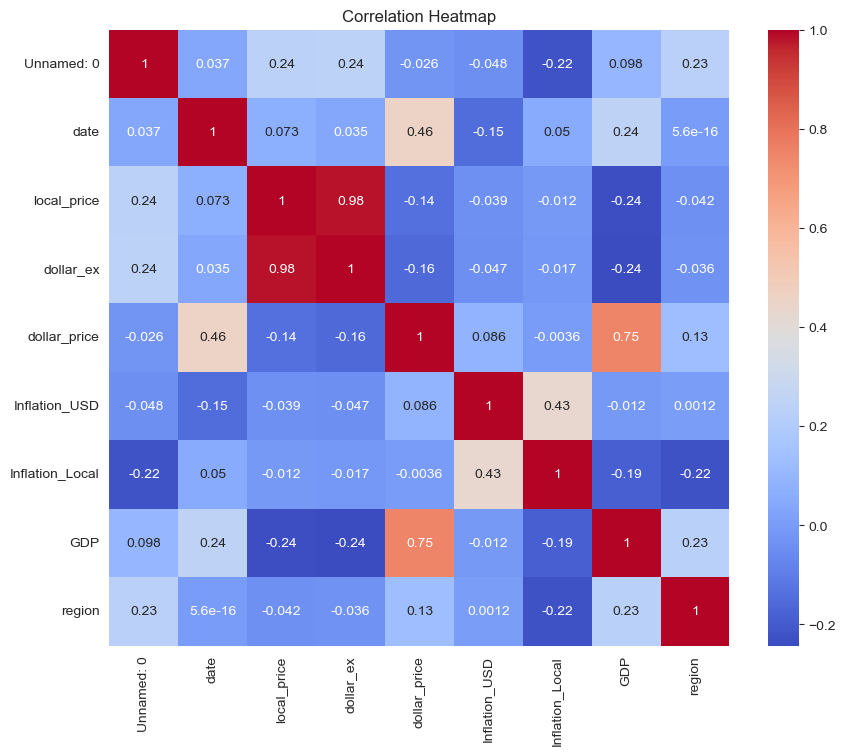

In [569]:

data = bigmac
try:
    data.drop(["name","currency_code","iso_a3"], axis=1, inplace=True)
except:
    pass

label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])
print(data)

# Compute correlation matrix
corr_matrix = data.corr()

# Plot heatmap

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


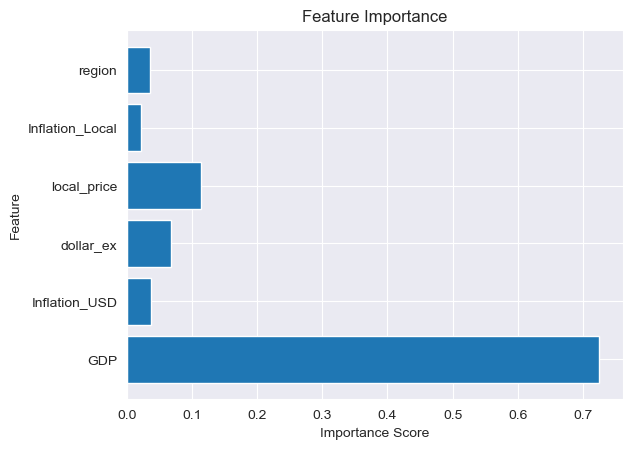

In [570]:
# Train Random Forest
model = RandomForestRegressor(random_state=42)
data.fillna(0, inplace=True)
X = data[['GDP', 'Inflation_USD', 'dollar_ex', "local_price", "Inflation_Local", "region"]]  # Predictors
y = data['dollar_price']  # Target

model.fit(X, y)

# Get feature importance
importance = model.feature_importances_

# Create a bar plot
plt.barh(X.columns, importance)
plt.title("Feature Importance")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [571]:
data

,Unnamed: 0,date,local_price,dollar_ex,dollar_price,Inflation_USD,Inflation_Local,GDP,region
0,0,2000-04-01,2.95,1.790,1.648045,0.000000,0.000000,3726.811669,0
1,1,2001-04-01,3.60,2.190,1.643836,-0.002554,0.220339,3142.235140,0
2,2,2002-04-01,3.60,2.340,1.538462,-0.064103,0.000000,2824.715413,0
3,3,2003-04-01,4.55,3.070,1.482085,-0.036645,0.263889,3056.649798,0
4,4,2004-05-01,5.40,3.180,1.698113,0.145760,0.186813,3623.224462,0
...,...,...,...,...,...,...,...,...,...
478,562,2016-07-01,370.00,106.725,3.466854,0.161256,0.000000,39375.473162,1
479,563,2017-07-01,380.00,113.060,3.361047,-0.030520,0.027027,38834.052934,1
480,564,2018-07-01,390.00,111.250,3.505618,0.043014,0.026316,39751.133098,1
481,565,2019-07-09,390.00,108.765,3.585712,0.022847,0.000000,40415.956765,1


In [598]:
from sklearn.model_selection import train_test_split

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print shapes to confirm split
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (386, 6)
X_test shape: (97, 6)
y_train shape: (386,)
y_test shape: (97,)


In [573]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)


/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/

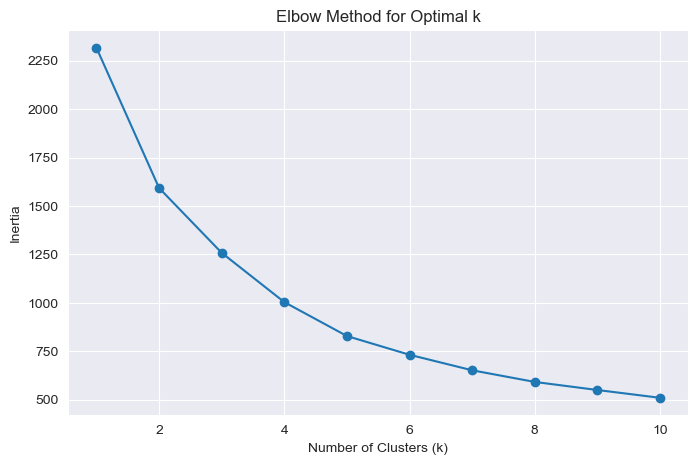

In [574]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Determine the optimal number of clusters
inertia = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


In [575]:
# Train K-Means with the optimal number of clusters (e.g., k=3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataset
X_train['Cluster'] = clusters


/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


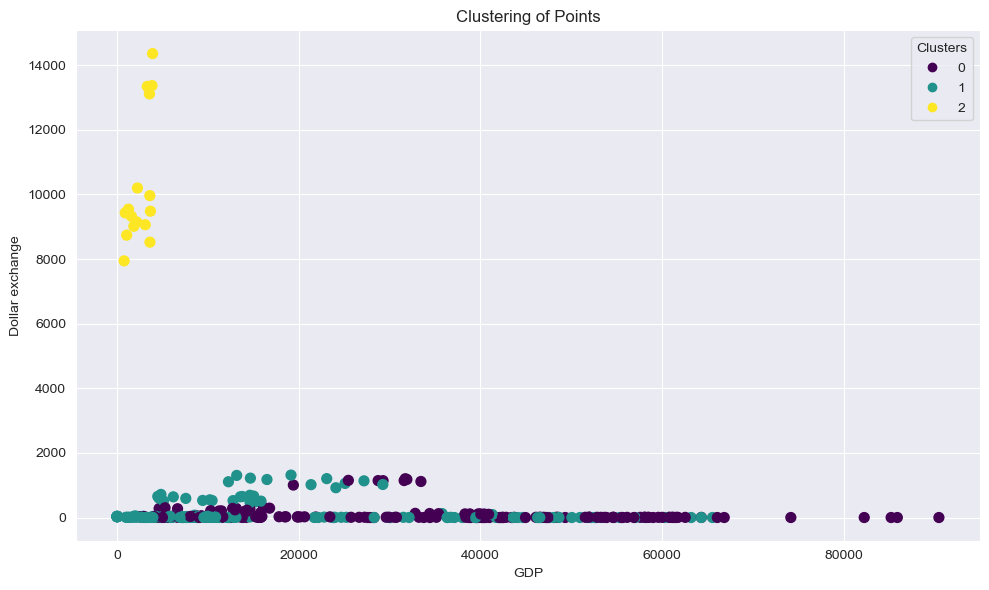

In [576]:
import matplotlib.pyplot as plt

# Example dataset: Ensure clusters and features (e.g., GDP, dollar_ex) are in the dataframe
clusters = X_train['Cluster']  # Cluster labels

# Create 2D Scatter Plot
plt.figure(figsize=(10, 6))

# Scatter plot
scatter = plt.scatter(X_train['GDP'], X_train['dollar_ex'], c=clusters, cmap='viridis', s=50)

# Add labels and title
plt.title("Clustering of Points")
plt.xlabel("GDP")
plt.ylabel("Dollar exchange")

# Add legend
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.tight_layout()
plt.show()

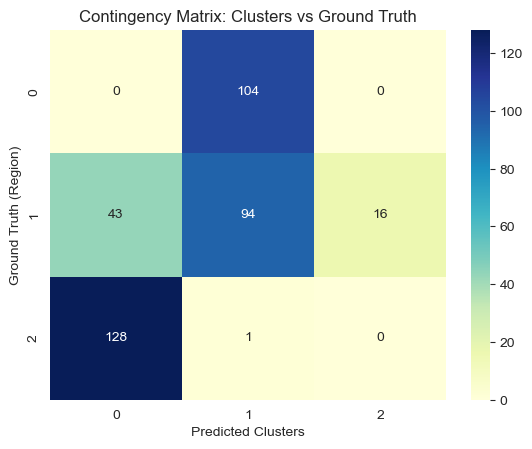

In [577]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(contingency_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.title("Contingency Matrix: Clusters vs Ground Truth")
plt.xlabel("Predicted Clusters")
plt.ylabel("Ground Truth (Region)")
plt.show()
    

In [578]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Use K-Means to create clusters
kmeans = KMeans(n_clusters=3, random_state=42)
X_train['Cluster'] = kmeans.fit_predict(X_train[['GDP', 'dollar_ex']])



# Step 3: Train a regression model
regressor = RandomForestRegressor()
regressor.fit(X_train[['GDP', 'dollar_ex', 'Cluster']], y_train)

X_test['Cluster'] = kmeans.predict(X_test[['GDP', 'dollar_ex']])
# Predict and evaluate
y_pred = regressor.predict(X_test[['GDP', 'dollar_ex', 'Cluster']])
print("Regression with Cluster Feature")
print(y_pred)


Regression with Cluster Feature
[3.70356663 3.31795481 3.02597984 2.47543001 2.67234655 2.63641549
 1.7344941  3.32292459 2.91459545 2.68953808 3.96409493 3.05975602
 2.33402205 4.48871574 1.21611244 1.9932476  2.08376798 2.0093625
 2.93592515 3.58659725 2.48657606 2.49115828 3.6593542  2.92642668
 3.82097149 3.11967788 3.90566926 2.42887385 7.10444826 5.33462546
 6.32656868 2.53668156 2.87267852 6.73882364 1.72648014 4.1185254
 4.11658522 2.49273645 2.70445759 2.93127734 1.93129904 2.33731406
 4.37093339 3.37052378 2.18349047 2.82756244 4.20540454 2.29181102
 3.45440942 2.42241693 2.05545419 2.24542322 3.00999953 2.7382914
 1.76550576 1.96547119 3.10885321 2.20520465 4.27120218 3.45251272
 1.4465773  3.39944298 3.33243408 2.32969513 2.04363509 3.69227166
 2.75136883 6.55574796 3.44758632 2.40213593 2.55576179 5.93103949
 6.76555055 2.27120129 3.02469921 6.56870565 3.7313961  1.68089568
 4.08655508 4.00541303 2.70499673 1.346795   1.73200865 6.61392957
 1.44002818 2.53669879 5.74736931

/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [579]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.39
Mean Squared Error (MSE): 0.37
Root Mean Squared Error (RMSE): 0.61
R² Score: 0.82


In [580]:
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Step 1: Use K-Means to create clusters


# Step 3: Train a regression model
regressor = RandomForestRegressor()
regressor.fit(X_train[['GDP', 'dollar_ex']], y_train)

y_pred = regressor.predict(X_test[['GDP', 'dollar_ex']])
print("Regression with Cluster Feature")
print(y_pred)

Regression with Cluster Feature
[3.70683883 3.39642777 3.01137933 2.48381165 2.57008876 2.61481738
 1.7535645  3.39717959 2.94845205 2.85006725 3.91370323 2.95426281
 2.30301838 4.34814819 1.21365796 1.9884718  2.05833634 2.08194897
 2.91876933 3.55647447 2.45889587 2.53043637 3.68464754 2.92099154
 4.01381111 3.0697829  3.92584975 2.46318649 7.11637246 5.1775995
 6.37321518 2.62903868 2.84412598 6.75951523 1.71783982 4.05928346
 4.29016027 2.61235902 2.65794633 2.90043656 1.91977148 2.22610219
 4.353239   3.28346658 2.23563507 2.84248282 4.11222691 2.40664629
 3.43258516 2.50173865 2.05386045 2.24973122 3.00111798 2.77850555
 1.74144543 1.94815147 3.16043966 2.23517207 4.28619705 3.64006709
 1.43383162 3.39437829 3.38741715 2.3274178  2.02550778 3.65307403
 2.76458777 6.58841029 3.50508117 2.46540238 2.57632999 5.93191992
 6.80243543 2.27519855 3.02627788 6.5623469  3.81549553 1.59062722
 4.12392163 4.04709314 2.57448122 1.29803752 1.79892155 6.63646051
 1.42597271 2.72092592 5.919001

In [581]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.35
Root Mean Squared Error (RMSE): 0.59
R² Score: 0.83


In [582]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Assuming y_test contains ground truth categories (e.g., regions)
ari = adjusted_rand_score(y_test, X_test['Cluster'])
silhouette = silhouette_score(X_test[['GDP', 'dollar_ex']], X_test['Cluster'])

print(f"Adjusted Rand Index (ARI): {ari:.2f}")
print(f"Silhouette Score: {silhouette:.2f}")


Adjusted Rand Index (ARI): 0.00
Silhouette Score: 0.56


/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/metrics/cluster/_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)


In [583]:
# Without Cluster feature
X_train = X_train[['GDP', 'dollar_ex', 'Cluster']]
X_test = X_test[['GDP', 'dollar_ex', 'Cluster']]
regressor_no_cluster = RandomForestRegressor()
regressor_no_cluster.fit(X_train.drop(columns=['Cluster']), y_train)
y_pred_no_cluster = regressor_no_cluster.predict(X_test.drop(columns=['Cluster']))

# Calculate R² for both
r2_with_cluster = r2_score(y_test, y_pred)
r2_without_cluster = r2_score(y_test, y_pred_no_cluster)

print(f"R² with Cluster Feature: {r2_with_cluster:.5f}")
print(f"R² without Cluster Feature: {r2_without_cluster:.5f}")


R² with Cluster Feature: 0.83014
R² without Cluster Feature: 0.83048


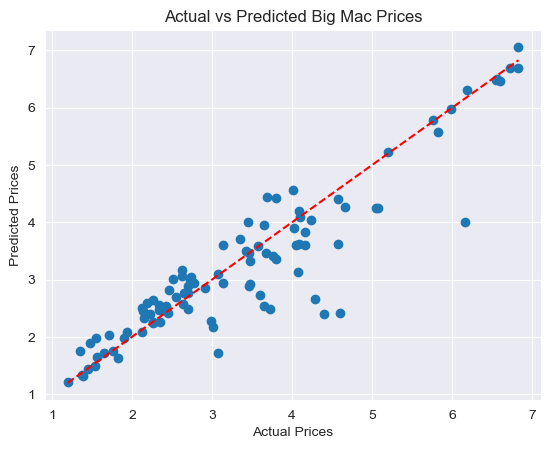

In [584]:
import matplotlib.pyplot as plt
regressor = RandomForestRegressor()
regressor.fit(X_train[['GDP', 'dollar_ex']], y_train)

y_pred = regressor.predict(X_test[['GDP', 'dollar_ex']])


plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Big Mac Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Reference line
plt.show()


In [540]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Instantiate the model
regressor = RandomForestRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train[['GDP', 'dollar_ex']], y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 1080 candidates, totalling 5400 fits
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=400; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=500; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=200; to

/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
1800 fits failed out of a total of 5400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1800 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jameslim/miniconda3/envs/MGT301-MachineLearning/lib/python3.8/site-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/Users/jameslim/miniconda3/envs/MGT301-MachineLearni

Best parameters: {'bootstrap': True, 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Best score: 0.7696865885484534


In [585]:
# Instantiate and train the best model
best_regressor = grid_search.best_estimator_

# Fit to training data
best_regressor.fit(X_train, y_train)

# Predict the test data
y_pred = best_regressor.predict(X_test)

# Evaluate the model's performance
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Absolute Error (MAE):", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error (RMSE):", mean_squared_error(y_test, y_pred, squared=False))


R² Score: 0.8315919246587682
Mean Absolute Error (MAE): 0.3952050012999962
Mean Squared Error (MSE): 0.34425942476670435
Root Mean Squared Error (RMSE): 0.5867362480422565


In [586]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('RIDGE', Ridge()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(("Forest", RandomForestRegressor()))

In [587]:
num_folds = 10
seed = 42
scoring = 'neg_mean_squared_error'
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True,random_state=42)
    # train the model
    cv_results = cross_val_score(model, X_train[['GDP', 'dollar_ex']], y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),cv_results.std())
    print(msg)
    
for name, model in models:
    regressor = model
    regressor.fit(X_train[['GDP', 'dollar_ex']], y_train)
        # Predict and evaluate
    y_pred = regressor.predict(X_test[['GDP', 'dollar_ex']])
    
# Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Print results
    print(name)
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    


LR: -0.743713 (0.205052)
LASSO: -0.743712 (0.205006)
RIDGE: -0.743713 (0.205052)
EN: -0.743712 (0.205029)
KNN: -0.562884 (0.148466)
CART: -0.539861 (0.197895)
SVR: -0.619824 (0.184804)
Forest: -0.382257 (0.178300)
LR
Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.91
R² Score: 0.59
LASSO
Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.91
R² Score: 0.59
RIDGE
Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.91
R² Score: 0.59
EN
Mean Absolute Error (MAE): 0.69
Mean Squared Error (MSE): 0.84
Root Mean Squared Error (RMSE): 0.91
R² Score: 0.59
KNN
Mean Absolute Error (MAE): 0.53
Mean Squared Error (MSE): 0.53
Root Mean Squared Error (RMSE): 0.73
R² Score: 0.74
CART
Mean Absolute Error (MAE): 0.49
Mean Squared Error (MSE): 0.61
Root Mean Squared Error (RMSE): 0.78
R² Score: 0.70
SVR
Mean Absolute Error (MAE): 0.58
Mean Squared Error (MSE): 0.67
Ro

[array([-0.87850466, -0.90342341, -0.912405  , -0.5286402 , -0.58131541,
       -0.64391706, -0.61261597, -1.06778126, -0.40174215, -0.9067846 ]), array([-0.87857588, -0.90336557, -0.91230084, -0.52863965, -0.58151155,
       -0.64389938, -0.612699  , -1.06765379, -0.40171442, -0.90675673]), array([-0.87850466, -0.90342341, -0.912405  , -0.5286402 , -0.58131541,
       -0.64391706, -0.61261597, -1.06778126, -0.40174215, -0.9067846 ]), array([-0.87854021, -0.90339453, -0.91235301, -0.52863988, -0.5814134 ,
       -0.64390808, -0.6126574 , -1.06771755, -0.4017283 , -0.90677068]), array([-0.71693955, -0.63064028, -0.59572216, -0.41873763, -0.51073294,
       -0.45549288, -0.3453289 , -0.80498961, -0.41741782, -0.73283469]), array([-0.44713496, -0.6164435 , -0.67639094, -0.4364813 , -0.63859716,
       -0.44715177, -0.16083965, -0.69974435, -0.37235452, -0.90346844]), array([-0.66424197, -0.70615392, -0.80132178, -0.40354629, -0.49711085,
       -0.53905122, -0.48279555, -0.95898612, -0.35

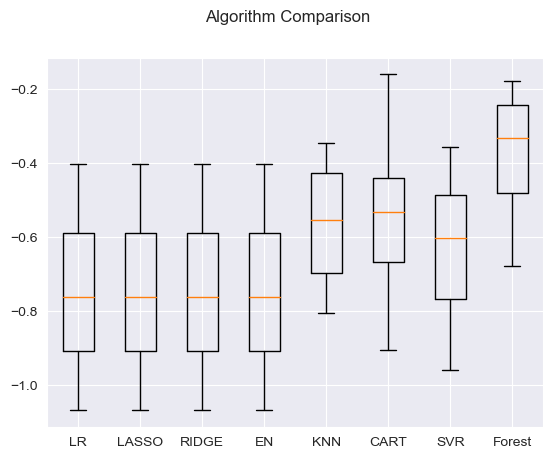

In [588]:
# Compare Algorithms
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [589]:
pipelines = []
pipelines.append(('ScaledLR', Pipeline([('Scaler',
StandardScaler()),('LR', LinearRegression())])))
pipelines.append(('ScaledLASSO', Pipeline([('Scaler',
StandardScaler()),('LASSO', Lasso())])))
pipelines.append(('ScaledRIDGE', Pipeline([('Scaler',
StandardScaler()),('RIDGE', Ridge())])))
pipelines.append(('ScaledEN', Pipeline([('Scaler',
StandardScaler()),('EN', ElasticNet())])))
pipelines.append(('ScaledKNN', Pipeline([('Scaler',
StandardScaler()),('KNN', KNeighborsRegressor())])))
pipelines.append(('ScaledCART', Pipeline([('Scaler',
StandardScaler()),('CART', DecisionTreeRegressor())])))
pipelines.append(('ScaledSVR', Pipeline([('Scaler',
StandardScaler()),('SVR', SVR())])))
pipelines.append(('ScaledForest', Pipeline([('Scaler',
StandardScaler()),('Forest', RandomForestRegressor())])))

In [590]:
results = []
names = []
for name, model in pipelines:
    # define how to split off validation data
    kfold = KFold(n_splits=num_folds, shuffle=True,random_state=seed)
    # train the model
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),
    cv_results.std())
    print(msg)

ScaledLR: -0.609075 (0.188218)
ScaledLASSO: -1.650655 (0.317393)
ScaledRIDGE: -0.609031 (0.187830)
ScaledEN: -1.168445 (0.231739)
ScaledKNN: -0.528318 (0.142224)
ScaledCART: -0.537910 (0.196165)
ScaledSVR: -0.592127 (0.184016)
ScaledForest: -0.382924 (0.176380)


[array([-0.62122497, -0.75051002, -0.71215715, -0.39864588, -0.53411765,
       -0.52447265, -0.3855043 , -1.01915923, -0.42148882, -0.72346837]), array([-1.78472617, -1.48516885, -1.39221304, -1.39913961, -1.88473012,
       -1.0749538 , -1.56133802, -1.69203252, -2.07911671, -2.15312921]), array([-0.62392453, -0.74936708, -0.7114343 , -0.39854638, -0.53470519,
       -0.5233541 , -0.38515684, -1.01667518, -0.42122055, -0.72592617]), array([-1.33452416, -1.1040435 , -1.0264309 , -0.94345618, -1.26899433,
       -0.74894295, -1.00564884, -1.32901798, -1.35182016, -1.57156792]), array([-0.59446452, -0.63625471, -0.53830726, -0.38394488, -0.49379155,
       -0.38730035, -0.32408235, -0.7108558 , -0.4385899 , -0.77559259]), array([-0.41886837, -0.65663583, -0.66453661, -0.47012872, -0.46171685,
       -0.45019061, -0.19738003, -0.76031133, -0.3927563 , -0.90657985]), array([-0.50916474, -0.75064283, -0.73721507, -0.35467843, -0.5308282 ,
       -0.48997379, -0.39014274, -0.97880841, -0.47

[Text(1, 0, 'ScaledLR'),
 Text(2, 0, 'ScaledLASSO'),
 Text(3, 0, 'ScaledRIDGE'),
 Text(4, 0, 'ScaledEN'),
 Text(5, 0, 'ScaledKNN'),
 Text(6, 0, 'ScaledCART'),
 Text(7, 0, 'ScaledSVR'),
 Text(8, 0, 'ScaledForest')]

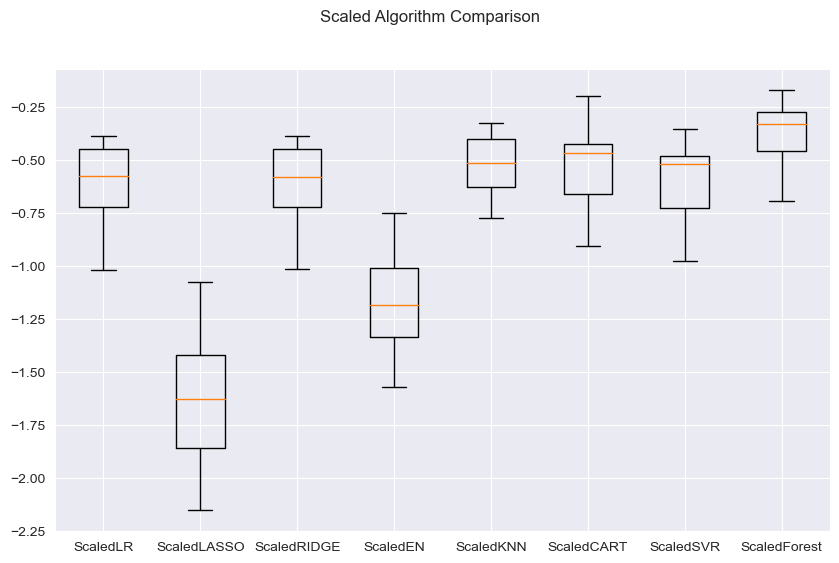

In [591]:
# Compare Algorithms
print(results)
fig = plt.figure(figsize=(10, 6))

fig.suptitle('Scaled Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)


In [592]:
# Basic performance of CART using all training data
# without tuning!
# instantiate learning model
model = DecisionTreeRegressor()
# fitting the model
model.fit(X_train, y_train)
# estimate the response
estimates = model.predict(X_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))

[3.84409554 2.5483388  2.9953767  2.53942566 2.51184834 2.70758123
 1.69671262 3.53237498 2.59228876 2.78526505 5.85519649 2.42179617
 2.18333333 4.925138   1.19565217 1.92982456 2.13461538 1.98659051
 3.05028615 3.68313636 2.22856124 2.31858407 3.73333333 2.88152953
 4.83968542 3.14326408 2.5483388  2.2891714  6.90571049 4.27775934
 6.35914494 1.47435897 2.64483708 6.74168957 1.64383562 4.90718048
 4.60475825 2.2952366  2.95346062 2.97104888 1.44827586 1.61953728
 4.01414156 3.39908678 1.98659051 3.36104723 3.49622567 2.10068365
 3.49059595 2.33220829 1.92982456 2.19359331 2.9953767  3.1469735
 1.76372712 1.93793475 2.60836961 2.24550898 4.53593859 2.62467192
 1.4803849  3.33379661 2.9953767  2.33604834 2.13461538 3.68313636
 2.29901919 6.54417317 3.45703019 2.31858407 2.63083404 6.35914494
 6.74168957 2.19359331 3.09766739 6.54417317 3.94218134 1.44736842
 4.93597434 3.940222   2.29901919 1.27020785 1.53540058 6.54417317
 1.4        2.09734927 6.56400241 5.82684002 1.98659051 3.49059

In [593]:
# Exhaustive grid search to fine tune method parameters
# Start with an initial guess for parameters
param_grid = {
'max_depth': [10, 20, 30, 40],
'min_samples_split': [20, 40, 60, 80, 100],
'min_impurity_decrease': [0, 0.0005, 0.001, 0.005,
0.01] }
gridSearch = GridSearchCV(DecisionTreeRegressor(),
param_grid, scoring=scoring, cv=5)
grid_result = gridSearch.fit(X_train, y_train)
print('Initial score: ', grid_result.best_score_)
print('Initial parameters: ', grid_result.best_params_)


Initial score:  -0.5396565530634349
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}


In [550]:
# all
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.539657 (0.100617) with: {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 20}
-0.585659 (0.062171) with: {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 40}
-0.587928 (0.093397) with: {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 60}
-0.667117 (0.142459) with: {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 80}
-0.684206 (0.151861) with: {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 100}
-0.539657 (0.100617) with: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 20}
-0.585659 (0.062171) with: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 40}
-0.587928 (0.093397) with: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 60}
-0.667117 (0.142459) with: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 80}
-0.684206 (0.151861) with: {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split'

In [551]:
# instantiate learning model
model = DecisionTreeRegressor(max_depth=2,
min_impurity_decrease=0, min_samples_split=90)
# fitting the model
model.fit(X_train, y_train)
# predict the response
estimates = model.predict(X_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))


[2.95787056 4.94908681 2.95787056 2.95787056 2.95787056 2.95787056
 1.91714065 2.95787056 2.95787056 2.95787056 2.95787056 2.95787056
 2.95787056 4.94908681 1.91714065 2.95787056 2.95787056 2.95787056
 2.95787056 2.95787056 2.95787056 2.95787056 4.94908681 2.95787056
 2.95787056 2.95787056 4.94908681 2.95787056 4.94908681 4.94908681
 4.94908681 2.95787056 2.95787056 4.94908681 1.91714065 2.95787056
 2.95787056 2.95787056 2.95787056 2.95787056 1.91714065 1.91714065
 4.94908681 2.95787056 2.95787056 2.95787056 4.94908681 2.95787056
 2.95787056 2.95787056 2.95787056 1.91714065 2.95787056 2.95787056
 1.91714065 2.95787056 2.95787056 1.91714065 2.95787056 4.94908681
 1.91714065 2.95787056 2.95787056 1.91714065 2.95787056 2.95787056
 2.95787056 4.94908681 2.95787056 2.95787056 1.91714065 4.94908681
 4.94908681 1.91714065 2.95787056 4.94908681 2.95787056 1.91714065
 2.95787056 2.95787056 2.95787056 1.91714065 2.95787056 4.94908681
 2.95787056 2.95787056 4.94908681 4.94908681 2.95787056 2.9578

In [552]:
# Compute mean and std dev to be used for later scaling
scaler = StandardScaler().fit(X_train)
# Perform standardization by centering and scaling
rescaledX_train = scaler.transform(X_train)
# Possible values for k
k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
# grid of parameters (as dictionary as required later)
param_grid = dict(n_neighbors=k_values)
# set model to KNN regressor
model = KNeighborsRegressor()
# set up kfold for cross validation
kfold = KFold(n_splits=num_folds)
# set up grid search to try each given value of k
# using cross validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
# fit training data and get results
grid_result = grid.fit(rescaledX_train, y_train)
# best result
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))


Best: -0.509995 using {'n_neighbors': 13}


-0.786686 (0.256859) with: {'n_neighbors': 1}


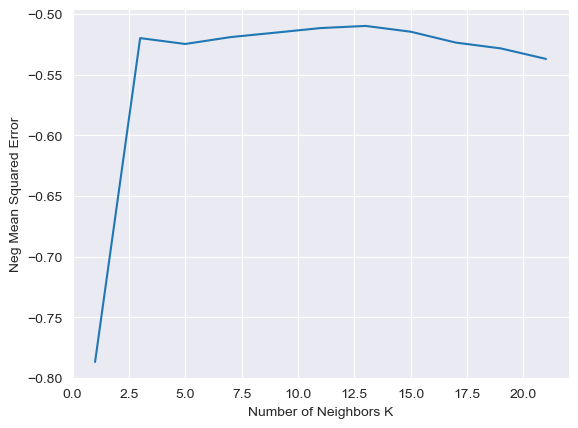

-0.520030 (0.097156) with: {'n_neighbors': 3}


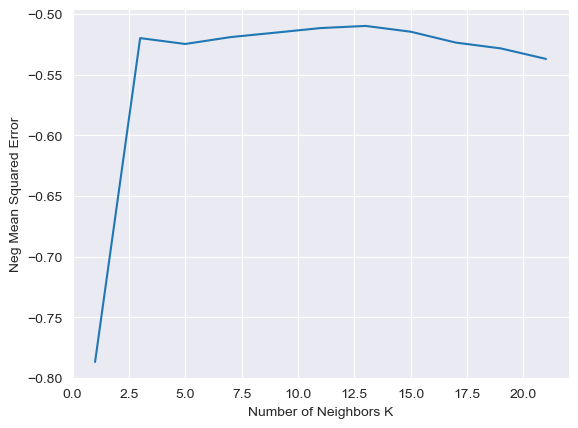

-0.524859 (0.137664) with: {'n_neighbors': 5}


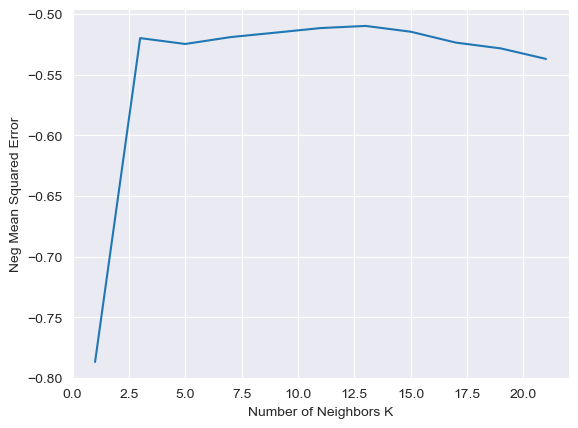

-0.519228 (0.153381) with: {'n_neighbors': 7}


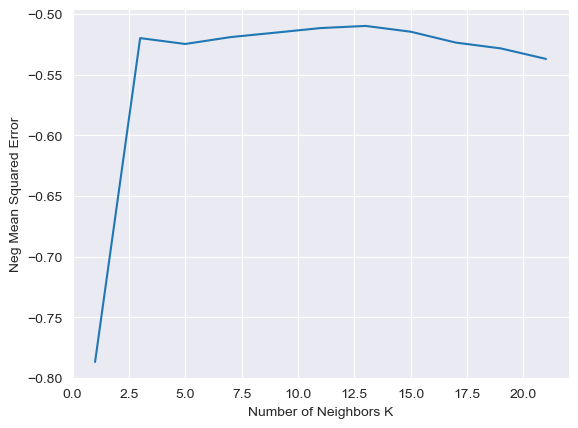

-0.515525 (0.179485) with: {'n_neighbors': 9}


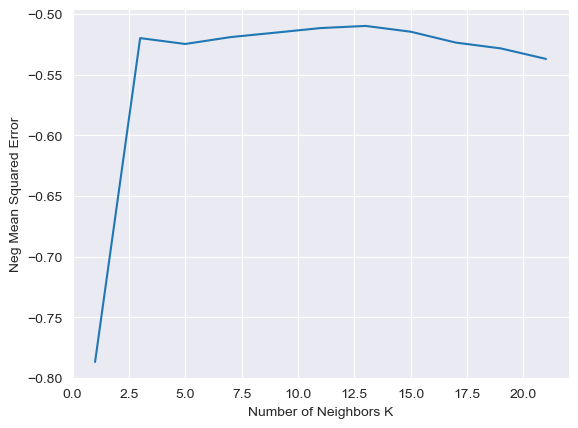

-0.511767 (0.178147) with: {'n_neighbors': 11}


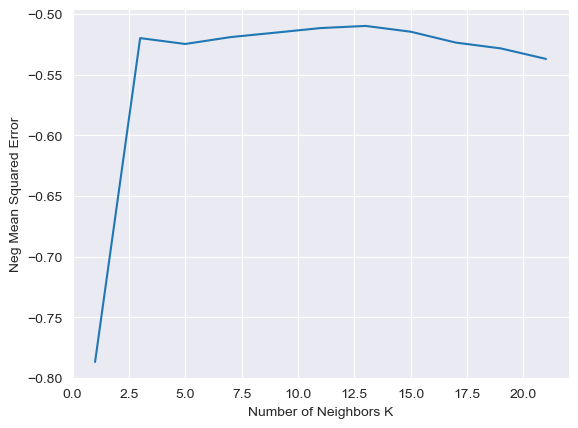

-0.509995 (0.170183) with: {'n_neighbors': 13}


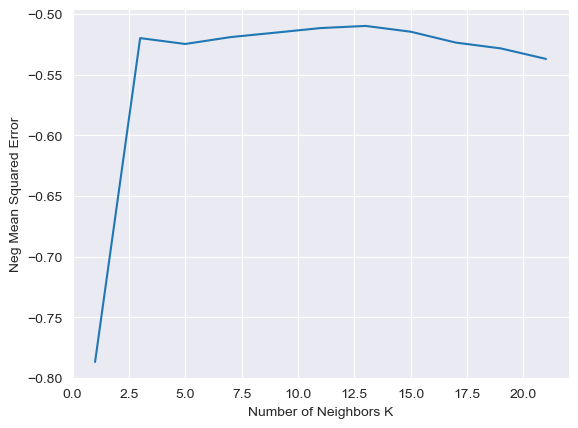

-0.514762 (0.167526) with: {'n_neighbors': 15}


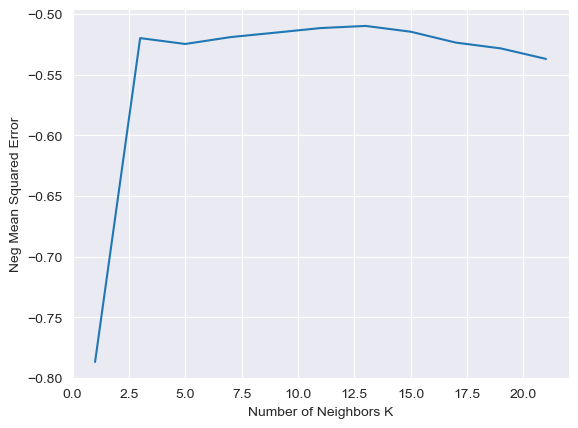

-0.523718 (0.159359) with: {'n_neighbors': 17}


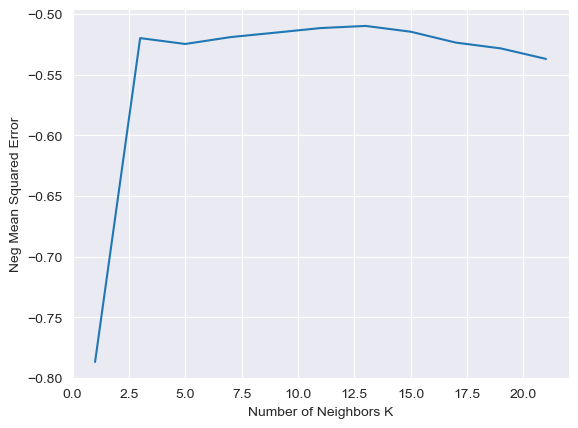

-0.528524 (0.161669) with: {'n_neighbors': 19}


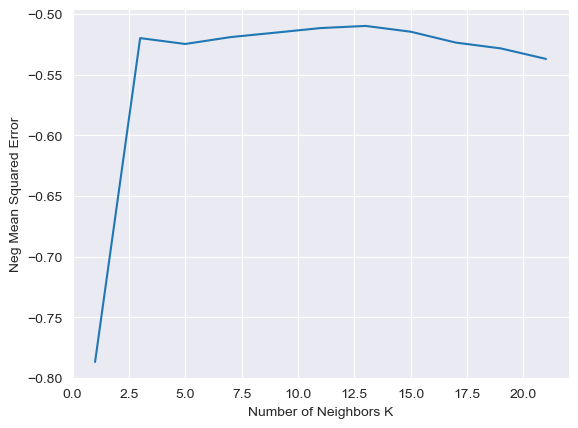

-0.537167 (0.160090) with: {'n_neighbors': 21}


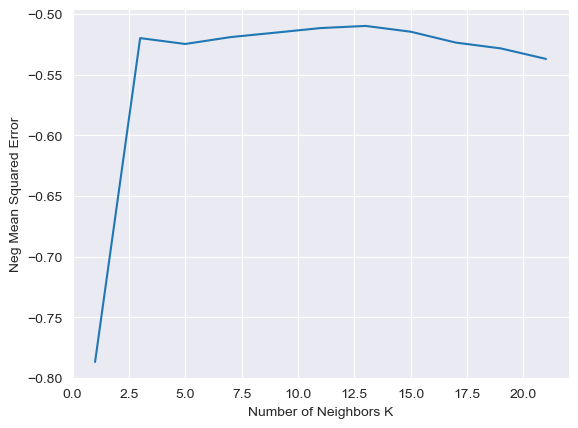

In [553]:
# all
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    # plot k vs error
    plt.plot(k_values, means)
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Neg Mean Squared Error')
    plt.show()


In [554]:
# prepare the model
scaler = StandardScaler().fit(X_train)
rescaledX_train = scaler.transform(X_train)
# calculate estimates for test dataset
# instantiate learning model
model = KNeighborsRegressor(n_neighbors=3)
# fitting the model
model.fit(rescaledX_train, y_train)


KNeighborsRegressor(n_neighbors=3)

In [555]:
# transform the test dataset
rescaledX_test = scaler.transform(X_test)
# estimate the response
estimates = model.predict(rescaledX_test)
print(estimates)
# evaluate performance
print(y_test)
print(mean_squared_error(y_test, estimates))


[3.86912542 2.96878135 2.81660754 2.73190966 2.41565382 2.59659996
 2.12744308 3.54286186 3.1623462  3.16780494 3.2492679  3.28898697
 2.28115749 4.00128939 1.21980676 2.68486552 1.58557064 2.28125274
 2.60470965 3.85651728 2.5892551  2.62376637 2.96878135 3.1623462
 4.02247789 3.03658691 3.62673743 2.32750158 7.17096641 5.80062495
 6.54833589 2.46254492 3.63359058 6.73052441 1.57234158 3.67287074
 3.67723448 2.72803586 2.38559856 3.03498387 1.73163872 2.61911011
 4.4702107  3.27030171 2.5892551  2.92049044 4.60958895 3.13890131
 3.49052504 2.73190966 2.44881083 2.29403706 3.04872671 3.2681231
 2.10683762 2.32920818 2.65651296 2.2206041  3.75186079 2.96878135
 1.39228626 3.4767021  4.02247789 2.31938675 1.58557064 4.04819128
 3.3953483  6.73052441 3.75186079 2.72321043 2.52826673 4.96584583
 7.17096641 2.29403706 3.54416945 6.73052441 3.67723448 1.4619249
 3.04872671 4.16606348 3.04872671 1.24376017 2.44881083 6.73052441
 1.36038862 3.90291196 5.61557422 4.35636993 3.52330417 3.4905250

In [556]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Calculate metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Absolute Error (MAE): 0.38
Mean Squared Error (MSE): 0.36
Root Mean Squared Error (RMSE): 0.60
R² Score: 0.82


CLASSIFICATION

In [599]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

# Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))


In [600]:
results = []
names = []
for name, model in models:
    # define how to split off validation data
    kfold = KFold(n_splits=10, shuffle=True,
    random_state=42)
    # train the model
    cv_results = cross_val_score(model, X_train[["GDP", "dollar_ex"]],
    X_train["region"], cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(),
    cv_results.std())
    print(msg)

LR: 0.432726 (0.067572)
LDA: 0.445682 (0.052295)
KNN: 0.525911 (0.081066)
CART: 0.850000 (0.058478)
NB: 0.401619 (0.049926)
SVM: 0.523414 (0.073996)


[array([0.41025641, 0.43589744, 0.35897436, 0.46153846, 0.41025641,
       0.48717949, 0.34210526, 0.57894737, 0.47368421, 0.36842105]), array([0.46153846, 0.38461538, 0.38461538, 0.46153846, 0.48717949,
       0.46153846, 0.39473684, 0.55263158, 0.47368421, 0.39473684]), array([0.56410256, 0.51282051, 0.43589744, 0.46153846, 0.51282051,
       0.66666667, 0.63157895, 0.5       , 0.39473684, 0.57894737]), array([0.82051282, 0.79487179, 0.76923077, 0.87179487, 0.84615385,
       0.8974359 , 0.97368421, 0.84210526, 0.89473684, 0.78947368]), array([0.41025641, 0.35897436, 0.33333333, 0.46153846, 0.43589744,
       0.38461538, 0.31578947, 0.47368421, 0.42105263, 0.42105263]), array([0.58974359, 0.64102564, 0.56410256, 0.41025641, 0.43589744,
       0.46153846, 0.60526316, 0.55263158, 0.47368421, 0.5       ])]


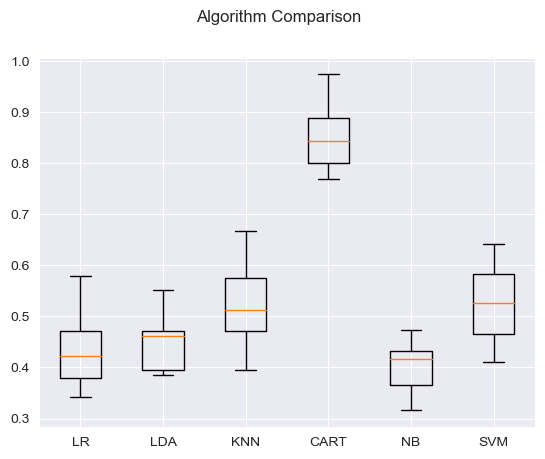

In [601]:
print(results)
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [602]:
# Make predictions on test dataset
# instantiate learning model
cart = DecisionTreeClassifier()
# fitting the model
cart.fit(X_train[["GDP", "dollar_ex"]], X_train["region"])
# predict the response
predictions = cart.predict(X_test[["GDP", "dollar_ex"]])
print(predictions)

[0 1 0 2 2 1 1 0 1 1 0 0 1 2 1 1 0 1 0 0 0 1 0 1 0 1 1 1 2 2 2 2 1 2 0 2 1
 1 1 0 1 1 2 2 1 2 1 1 2 2 1 1 0 0 1 1 1 1 0 2 1 2 0 1 0 0 2 2 1 1 1 2 2 1
 2 2 2 1 2 2 2 1 1 2 1 1 2 2 1 2 2 1 1 1 2 2 1]


In [603]:
from sklearn.metrics import accuracy_score, classification_report

print(y_test)
# evaluate accuracy
print(accuracy_score(X_test["region"], predictions))
print(confusion_matrix(X_test["region"], predictions))
print(classification_report(X_test["region"], predictions))

417    4.050757
473    4.083456
181    2.733621
445    2.129057
297    2.187500
         ...   
218    1.829090
392    2.428422
321    3.647976
334    4.101314
126    1.385965
Name: dollar_price, Length: 97, dtype: float64
0.8247422680412371
[[15  5  2]
 [ 0 35  1]
 [ 4  5 30]]
              precision    recall  f1-score   support

           0       0.79      0.68      0.73        22
           1       0.78      0.97      0.86        36
           2       0.91      0.77      0.83        39

    accuracy                           0.82        97
   macro avg       0.83      0.81      0.81        97
weighted avg       0.83      0.82      0.82        97



In [605]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [606]:
# Generate confusion matrix
cm = confusion_matrix(X_test["region"], predictions)


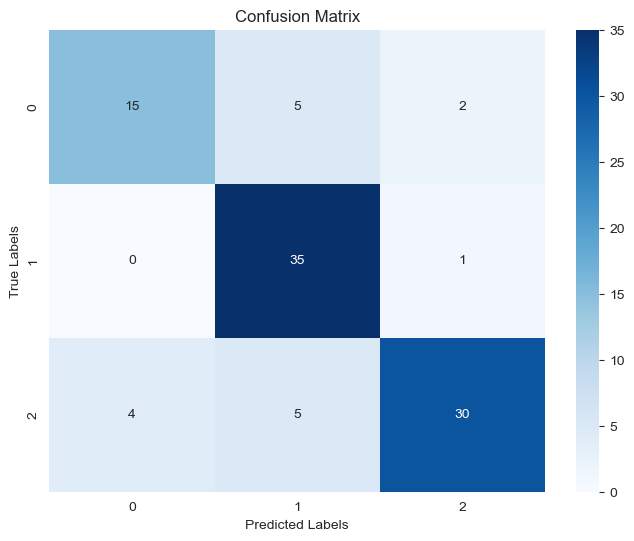

In [607]:
# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

